In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline

This project analyzes simulated data from IBM’s HR department 
    in an attempt to understand the causes of employee attrition.  

The original data set can be found here: 
        https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset.  

In [3]:
#BigQuestion: What leads to employee attrition?

#assign data frames
df = pd.read_csv('Data/IMB_HR.csv')
df_quitters = df.loc[lambda df: df['Attrition'] == 'Yes', :]
df_stayers = df.loc[lambda df: df['Attrition'] == 'No', :]

Of the thirty or so parameters included in this data set, two stood out immediately for their diagnostic value: 
    Environment Satisfaction and Job Satisfaction.  
    Both of these data were reported categorically as follows: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.  

EnvironmentSatisfaction reults:  Ttest_indResult(statistic=4.341526260095529, pvalue=1.8044193205570875e-05)


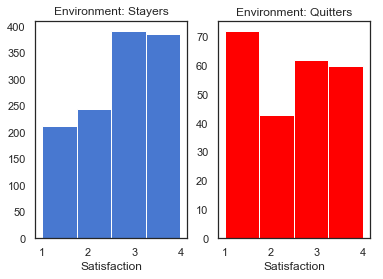

In [96]:
#Plot histograms of EnvironmentSatisfaction for quitters and stayers
plt.subplot(1, 2, 1)
plt.hist(df_stayers['EnvironmentSatisfaction'], bins=4)
plt.title('Environment: Stayers')
plt.xlabel('Satisfaction')

plt.subplot(1, 2, 2)
plt.hist(df_quitters['EnvironmentSatisfaction'], bins=4, color='red')
plt.title('Environment: Quitters')
plt.xlabel('Satisfaction')
plt.show
#Stayers appear to be more likely to report high levels of EnvironmentSatisfaction

#Take a random sample of both quitters and stayers for the T-test
pop1 = np.random.choice(df_quitters['EnvironmentSatisfaction'], 200, replace=True)
pop2 = np.random.choice(df_stayers['EnvironmentSatisfaction'], 200, replace=True)

print('EnvironmentSatisfaction reults: ', ttest_ind(pop2, pop1, equal_var=False))

#null hypothesis 1: reported EnvironmentSatisfaction is not a meaningful predictor of attrition
#Ttest_indResult(statistic=2.7882170459720337, pvalue=0.005835820480704537)
#with a p-value this small, we reject the null hypothesis.

Histograms of satisfaction data show a stark contrast between employees 
    who left the company and employees who stayed.
    The p-values of a comparative t-test between the two groups corroborate 
    the initial impression that these two parameters are indeed diagnostic.

JobSatisfaction reults:  Ttest_indResult(statistic=3.169594204314147, pvalue=0.0016446956643314387)


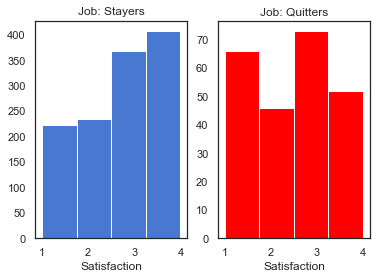

In [97]:
#SubQuestion2: JobSatisfaction was reported as follows: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#Is reported JobSatisfaction an indicator of attrition?

#Plot histograms of JobSatisfaction for quitters and stayers
plt.subplot(1, 2, 1)
plt.hist(df_stayers['JobSatisfaction'], bins=4)
plt.title('Job: Stayers')
plt.xlabel('Satisfaction')

plt.subplot(1, 2, 2)
plt.hist(df_quitters['JobSatisfaction'], bins=4, color='red')
plt.title('Job: Quitters')
plt.xlabel('Satisfaction')
plt.show
#Stayers appear to be more likely to report high levels of JobSatisfaction as well.

#Take a random sample of both quitters and stayers for the T-test
pop10 = np.random.choice(df_quitters['JobSatisfaction'], 200, replace=True)
pop20 = np.random.choice(df_stayers['JobSatisfaction'], 200, replace=True)

print('JobSatisfaction reults: ', ttest_ind(pop20, pop10, equal_var=False))

#null hypothesis 2: reported JobSatisfaction is not a meaningful predictor of attrition
#Ttest_indResult(statistic=3.0984688002063905, pvalue=0.0022282680241966554)
#with a p-value this small, we reject the null hypothesis.

The above analysis leads one to wonder Q2: what factors could be influencing the satisfaction rates of employees? 

Many of the parameters which were suspect, such as compensation rates and raises, 
    were not found to have statistical significance.  
    However, commute distance was statistically significant between the two groups, 
    as shown in the following diagram:


Commute comparison reults:  Ttest_indResult(statistic=-0.024168642784492732, pvalue=0.9807302029115748)


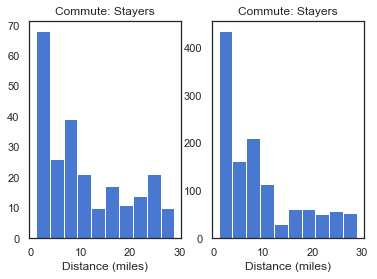

In [99]:
plt.subplot(1,2,1)
plt.hist(df_quitters['DistanceFromHome'])
plt.title('Commute: Quitters')
plt.xlabel('Distance (miles)')
plt.show

plt.subplot(1,2,2)
plt.hist(df_stayers['DistanceFromHome'])
plt.title('Commute: Stayers')
plt.xlabel('Distance (miles)')
plt.show

pop14 = np.random.choice(df_quitters['DistanceFromHome'], 200, replace=True)
pop24 = np.random.choice(df_stayers['DistanceFromHome'], 200, replace=True)

print('Commute comparison reults: ', ttest_ind(pop24, pop14, equal_var=False))

It seems intuitive that a long commute could have a deleterious effect on satisfaction rates, 
    but it seems unlikely to be solely responsible. 

Q3: Are there other meaningful differences between those staying at their job 
    and those leaving that could provide further insight?
    
One dramatic difference between the two groups was Marital Status.
    As the diagrams indicate, a much larger percentage of those leaving their job are single,
    and those who are staying comprise a higher percentage of married individuals. 

<function matplotlib.pyplot.show(*args, **kw)>

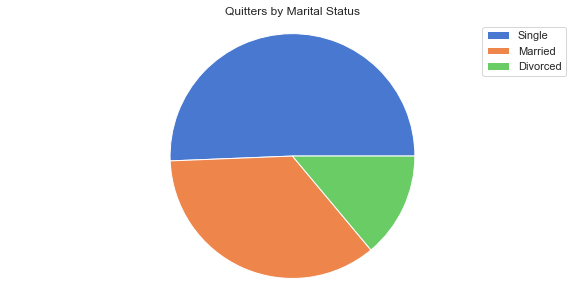

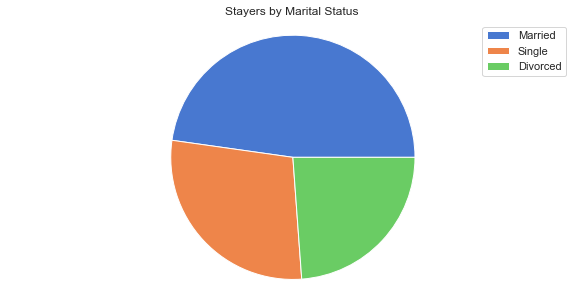

In [91]:
status_counts_quitters = pd.DataFrame(df_quitters['MaritalStatus'].value_counts())

status_counts_stayers = pd.DataFrame(df_stayers['MaritalStatus'].value_counts())

plt.figure(figsize=(10, 5))
plt.pie(status_counts_quitters.MaritalStatus)
plt.axis('equal')
plt.title('Quitters by Marital Status')
plt.legend(status_counts_quitters.index)
plt.show

plt.figure(figsize=(10, 5))
plt.pie(status_counts_stayers.MaritalStatus)
plt.axis('equal')
plt.title('Stayers by Marital Status')
plt.legend(status_counts_stayers.index)
plt.show

Another interesting difference was age. An impressive proportion of the employees leaving the company 
    are aged between 28 and 35, as indicated by the following diagram:

A comparative t-test shows that the difference here is statistically significant.


Age comparison reults:  Ttest_indResult(statistic=4.057467085325862, pvalue=5.9760921471870925e-05)


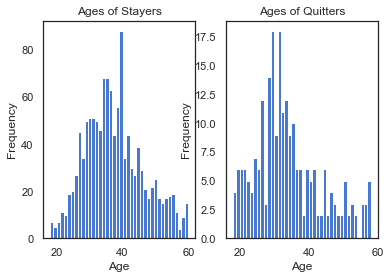

In [92]:
a = 'Age'

plt.subplot(1,2,1)
plt.hist(df_stayers[a], bins=40)
plt.title('Ages of Stayers')
plt.ylabel('Frequency')
plt.xlabel(a)
plt.show

plt.subplot(1,2,2)
plt.hist(df_quitters[a], bins=40)
plt.title('Ages of Quitters')
plt.ylabel('Frequency')
plt.xlabel(a)
plt.show

pop11 = np.random.choice(df_quitters['Age'], 200, replace=True)
pop22 = np.random.choice(df_stayers['Age'], 200, replace=True)

print(a, 'comparison reults: ', ttest_ind(pop22, pop11, equal_var=False))

#null hypothesis 3: Age is not a meaningful predictor of attrition
#Ttest_indResult(statistic=3.266905805297035, pvalue=0.0012838939363226968)
#with a p-value this small, we reject the null hypothesis.

Conclusion: While employees can leave their company for many different reasons, 
    the above data suggest that on average, 
    less satisfied employees tend to be younger, specifically between the ages of 28-35, 
    single (the stability of marriage may be responsible for motivating persons to stay in their jobs), 
    and with longer commutes.  Further inquiry could explore other interesting parameters 
    such as opportunity for advancement and perception of leadership.